In [7]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

symbol = '^N225'
#symbol = 'USDJPY=X'
ticker = yf.Ticker(symbol)
df = ticker.history(period='5y', interval='1mo')
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-01 00:00:00+09:00,38781.558594,38781.558594,31156.119141,38647.750000,3034000000,0.0,0.0
2024-09-01 00:00:00+09:00,39025.308594,39829.558594,35247.871094,37919.550781,2365000000,0.0,0.0
2024-10-01 00:00:00+09:00,38232.468750,40257.339844,37651.070312,39081.250000,2613600000,0.0,0.0
2024-11-01 00:00:00+09:00,38504.351562,39884.011719,37801.621094,38208.031250,2649300000,0.0,0.0
2024-12-01 00:00:00+09:00,38216.949219,40398.230469,37958.550781,39894.539062,2457900000,0.0,0.0


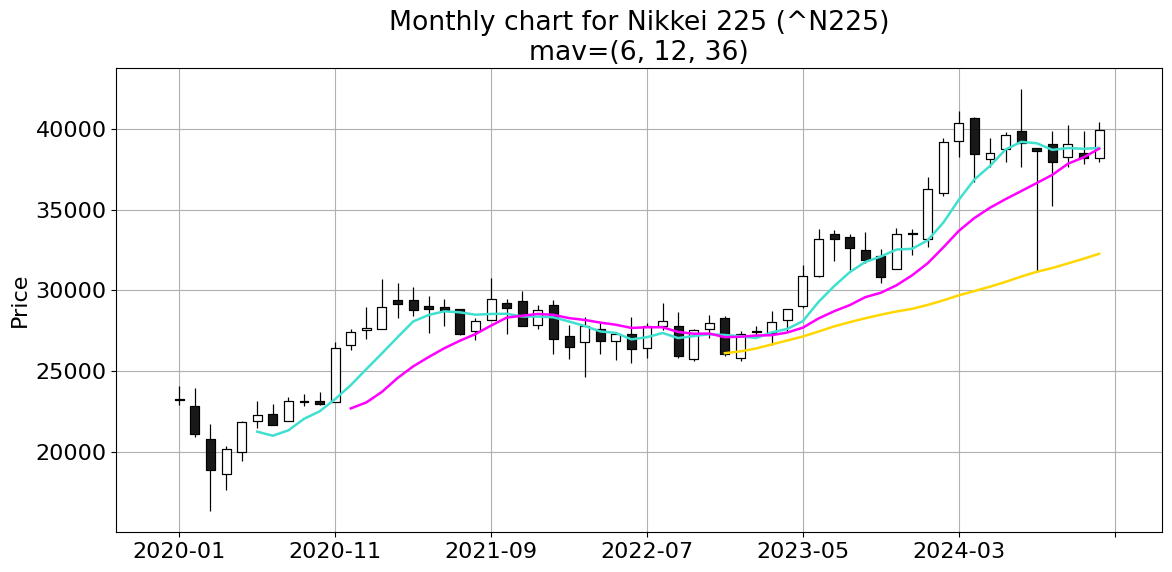

In [14]:
plt.rcParams["font.size"] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

mpf.plot(
    df, type='candle', style='default',
    mav=(6, 12, 36),
    volume=False,
    datetime_format='%Y-%m',
    xrotation=0,
    ax=ax,
)
ax.set_title('Monthly chart for %s (%s)\nmav=(6, 12, 36)' %(ticker.info['longName'], symbol))
ax.grid()

plt.tight_layout()
plt.savefig('monthly_chart_n225.png')
plt.show()

In [9]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-12-01 00:00:00+09:00,38216.949219,40398.230469,37958.550781,39894.539062,2457900000,0.0,0.0


In [10]:
df.tail(2)['Close']

Date
2024-11-01 00:00:00+09:00    38208.031250
2024-12-01 00:00:00+09:00    39894.539062
Name: Close, dtype: float64

In [11]:
df.tail(2)['Close'].diff()

Date
2024-11-01 00:00:00+09:00            NaN
2024-12-01 00:00:00+09:00    1686.507812
Name: Close, dtype: float64

In [12]:
df['Close'].rolling(12).mean().tail()

Date
2024-08-01 00:00:00+09:00    36643.006836
2024-09-01 00:00:00+09:00    37148.167806
2024-10-01 00:00:00+09:00    37833.367839
2024-11-01 00:00:00+09:00    38226.796224
2024-12-01 00:00:00+09:00    38762.660156
Name: Close, dtype: float64